In [12]:
#import libraries to work with

import pandas as pd
import numpy as np
#if you get error in downloading talib file use 
##conda install -c conda-forge ta-lib"
## incase you have error in installing yahoo finance
import talib
import yfinance as yf



In [10]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=ad7c5e3405f39f68eaf80095524f2c0c741cd07bfaea578bcf61bb5de0a70e91
  Stored in directory: /Users/macbookair/Library/Caches/pip/wheels/ec/cc/c1/32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=ca4b5d1a0e20e01246c67a1f09a2c62729d064bfae52ff750f9203581297fe49
  Stored in directory: /Users/macbookair/Library/Caches/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [13]:
import matplotlib.pyplot as plt

In [14]:
# Step 1 download data from yahoo finance in a data frame 
#While using jupyter you can press tab key to know all the extension in that library
df = yf.download('TSLA',start="2020-01-01",end='2020-12-31',interval = '1d')
# to know how many rows and columns we have in data 
df.shape
#to find what is in first 5 rows on data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,81.000000,84.258003,80.416000,83.666000,83.666000,51428500
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500


In [15]:
df.shape
#253 rows of data in 6 columns

(253, 6)

In [19]:
#if you want to find out dividends that have been paid during this time period
a = yf.Ticker('TSLA')
a.dividends
#Tesla has not paid any dividends during this time period

Series([], Name: Dividends, dtype: int64)

<AxesSubplot:xlabel='Date'>

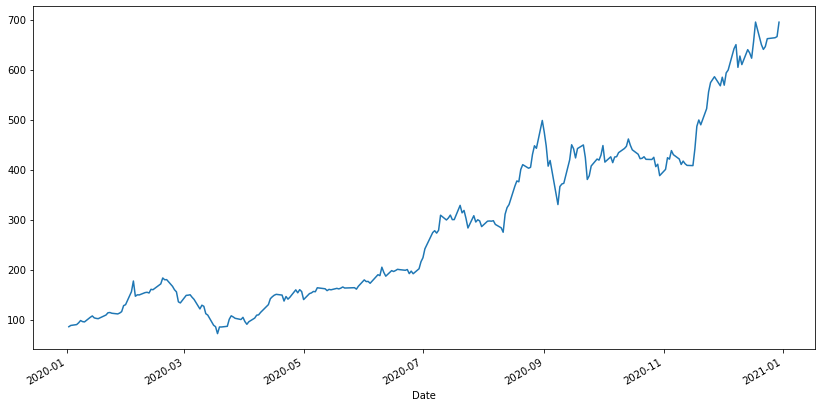

In [26]:
# Lets plot closing values on chart just to see the trend
df.rename(columns = {'Adj Close':'AdjClose'},inplace=True)
#Tried many times but couldnt access Adj column so renamed it then changed it
#Below line means plot all the entries post this date in 14 x 7 graph
df[df.index >= '2020-01-01'].AdjClose.plot(figsize=(14,7))

In [27]:
#to find out columns name in data frame
df.columns

Index(['Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume'], dtype='object')

In [28]:
# Create new column and compute 20 day moving averages
df['MA20'] = df.AdjClose.rolling(20).mean()

In [29]:
df['MA200'] = df.AdjClose.rolling(200).mean()

In [31]:
#Check if columns have been created or not
df.columns

Index(['Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume', 'MA20', 'MA200'], dtype='object')

<AxesSubplot:xlabel='Date'>

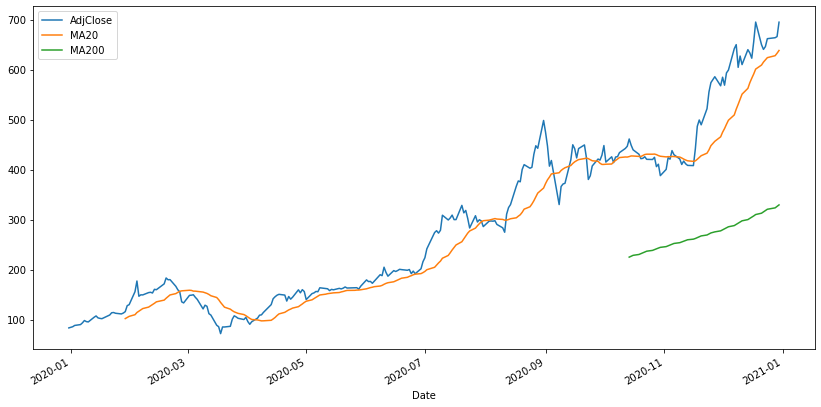

In [33]:
# Now plot selected columns on graph
df[['AdjClose','MA20','MA200']].plot(figsize=(14,7))

In [34]:
# We didnt get much values in MA 200 as our data consist of 253 points. If we extend data we can find more value and better chart
### According to Stan Weinstein: The price must be above the short term MA in order to buy a stock.

In [35]:
df['rsi'] = talib.RSI(df.Close, 14)

<AxesSubplot:xlabel='Date'>

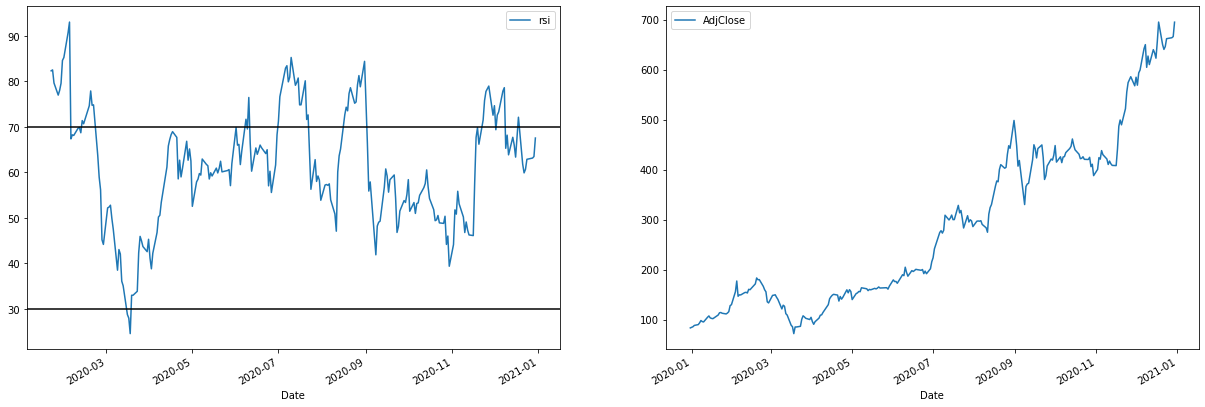

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))
ax0 = df[["rsi"]].plot(ax=ax[0])
ax0.axhline(30, color="black")
ax0.axhline(70, color="black")
df[["AdjClose"]].plot(ax=ax[1])

In [38]:
##RSI with a line on 30 for oversold and 70 for overbought
df.columns

Index(['Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume', 'MA20', 'MA200',
       'rsi'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

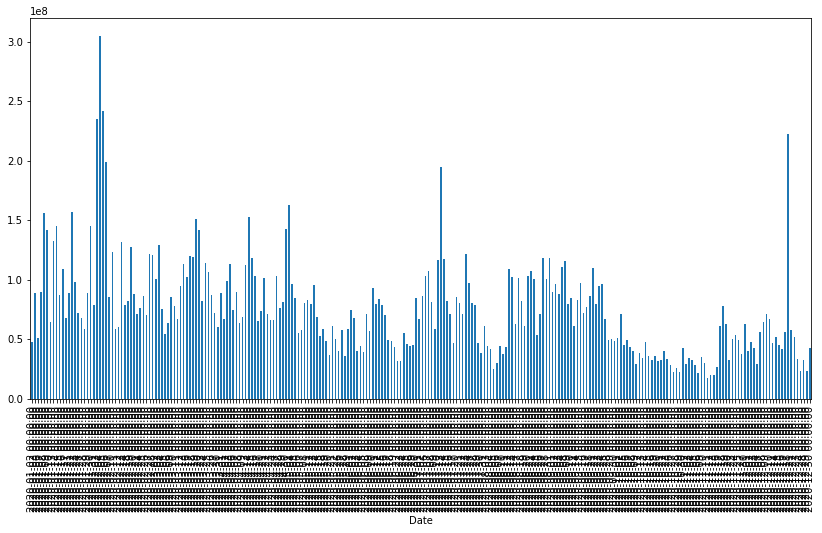

In [39]:
#now lets plot volume 
df[df.index >= '2020-01-01'].Volume.plot(kind = 'bar',figsize = (14,7))